In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = ['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

IMG_SIZE = 120

# paths for dataset
data_path = "C:\\Users\\jaina\\Desktop\\practice\\New folder\\media gesture\\dataset"

# Full paths for each category
#category_paths = [os.path.join(data_path, category) for category in CATEGORIES]


In [3]:
data_path 

'C:\\Users\\jaina\\Desktop\\practice\\New folder\\media gesture\\dataset'

In [4]:
# Loading the images and their class(0 - 9)
image_data = []

In [5]:
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        print(class_index)
        path = os.path.join(data_path, dr, category)
        print(path)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

0
C:\Users\jaina\Desktop\practice\New folder\media gesture\dataset\dataset\01_palm
1
C:\Users\jaina\Desktop\practice\New folder\media gesture\dataset\dataset\02_fist
2
C:\Users\jaina\Desktop\practice\New folder\media gesture\dataset\dataset\03_thumbs-up
3
C:\Users\jaina\Desktop\practice\New folder\media gesture\dataset\dataset\04_thumbs-down
4
C:\Users\jaina\Desktop\practice\New folder\media gesture\dataset\dataset\05_index-right
5
C:\Users\jaina\Desktop\practice\New folder\media gesture\dataset\dataset\06_index-left
6
C:\Users\jaina\Desktop\practice\New folder\media gesture\dataset\dataset\07_no-gesture


In [6]:
# shuffle the input data
import random
random.shuffle(image_data)

In [7]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [8]:
label[:7]

[0, 6, 2, 2, 0, 1, 6]

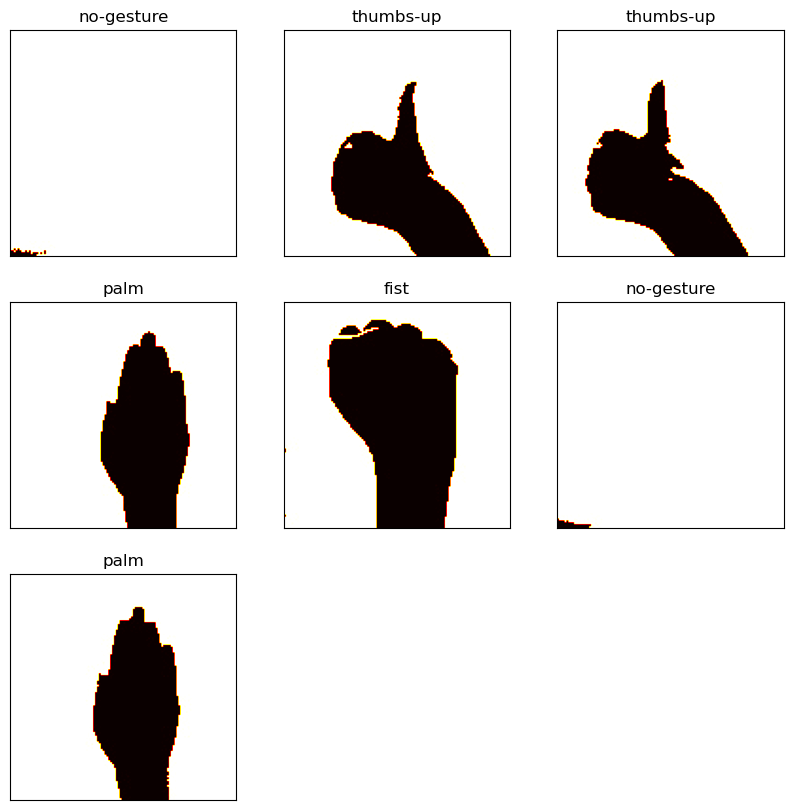

In [9]:
plt.figure(1, figsize=(10,10))
for i in range(1,8):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [10]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(560, 120, 120)

In [11]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=7,dtype='i1')
label[0]

array([1, 0, 0, 0, 0, 0, 0], dtype=int8)

## Building CNN 

In [12]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [14]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [15]:
history=model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
13/13 [==============================] - 7s 533ms/step - loss: 5.0051 - accuracy: 0.3291 - val_loss: 1.6551 - val_accuracy: 0.5179
Epoch 2/7
13/13 [==============================] - 7s 498ms/step - loss: 0.8371 - accuracy: 0.7755 - val_loss: 0.4387 - val_accuracy: 0.9226
Epoch 3/7
13/13 [==============================] - 6s 465ms/step - loss: 0.2442 - accuracy: 0.9388 - val_loss: 0.1080 - val_accuracy: 0.9821
Epoch 4/7
13/13 [==============================] - 7s 507ms/step - loss: 0.0251 - accuracy: 0.9974 - val_loss: 0.0429 - val_accuracy: 0.9881
Epoch 5/7
13/13 [==============================] - 6s 484ms/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.0503 - val_accuracy: 0.9821
Epoch 6/7
13/13 [==============================] - 7s 503ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9940
Epoch 7/7
13/13 [==============================] - 6s 467ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9940


In [16]:
model.save('visual_dummy.hdf5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 activation (Activation)     (None, 118, 118, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 116, 116, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 58, 58, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 58, 58, 32)        0         
                                                        

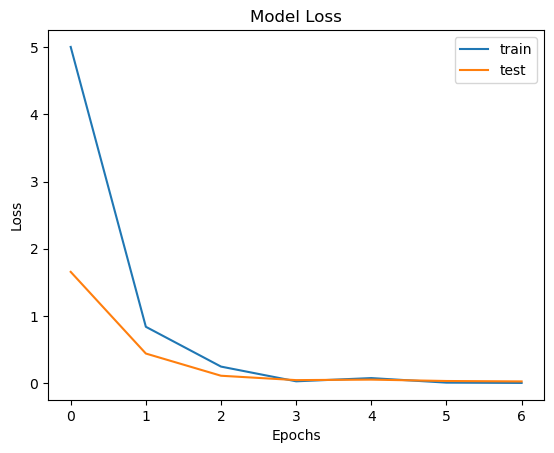

In [17]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
# save the figure
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

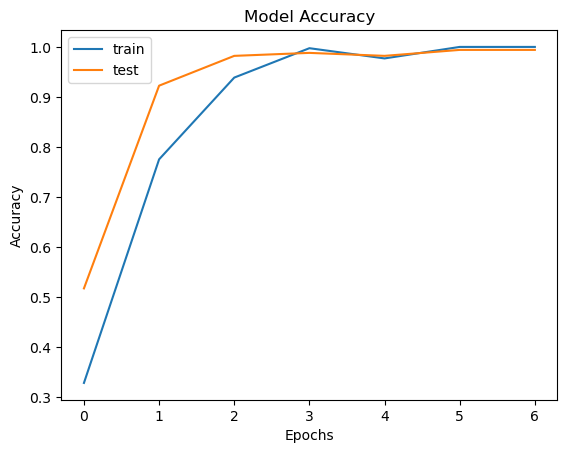

In [18]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
# save the figure
#plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

6/6 [==============================] - 0s 54ms/step - loss: 0.0235 - accuracy: 0.9940
Test accuracy: 99.40%


6/6 [==============================] - 0s 53ms/step


<Axes: xlabel='Predicted', ylabel='Actual'>

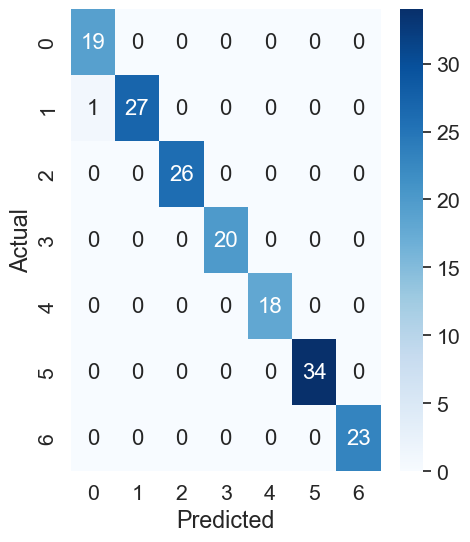

In [20]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)

data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,6))
sn.set(font_scale=1.4)#for label size
#plt.savefig('confusion_matrix.jpg')
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [21]:
from sklearn.metrics import classification_report
y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)
#Plotting the confusion matrix
target_names=['01_palm',
     '02_fist',
     '03_thumbs-up',
     '04_thumbs-down',
     '05_index-right',
     '06_index-left',
     '07_no-gesture']
print(classification_report(y_true, y_pred, target_names=target_names))

6/6 [==============================] - 0s 53ms/step
                precision    recall  f1-score   support

       01_palm       0.95      1.00      0.97        19
       02_fist       1.00      0.96      0.98        28
  03_thumbs-up       1.00      1.00      1.00        26
04_thumbs-down       1.00      1.00      1.00        20
05_index-right       1.00      1.00      1.00        18
 06_index-left       1.00      1.00      1.00        34
 07_no-gesture       1.00      1.00      1.00        23

      accuracy                           0.99       168
     macro avg       0.99      0.99      0.99       168
  weighted avg       0.99      0.99      0.99       168



In [22]:
print(classification_report(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6])) # Specify the labels parameter based on your class indices


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        23

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

def PerformanceReports(conf_matrix,class_report,labels):
    f, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_matrix, annot=True,ax=ax,cmap="Blues")
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
    ax.set_title('Classification Report')
    plt.show() 

6/6 [==============================] - 0s 53ms/step


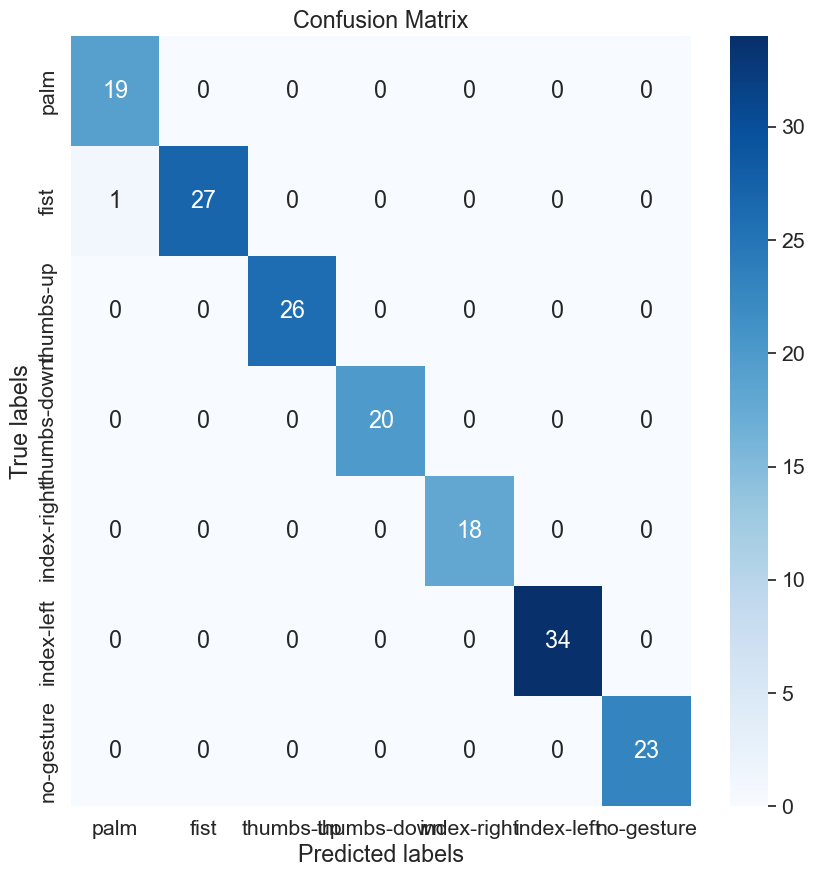

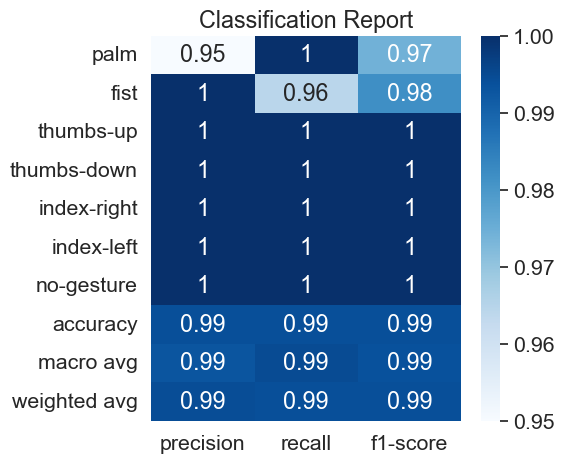

In [24]:
labels=['palm',
     'fist',
     'thumbs-up',
     'thumbs-down',
     'index-right',
     'index-left',
     'no-gesture']
    
test_labels = np.argmax(y_test, axis=1)
predictions = np.argmax(model.predict(X_test), axis=1)
cm=confusion_matrix(test_labels,predictions)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
PerformanceReports(cm,class_report,labels)

In [25]:
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          output_file,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):


    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig(output_file)
    plt.show()

6/6 [==============================] - 0s 54ms/step


<Axes: xlabel='Predicted', ylabel='Actual'>

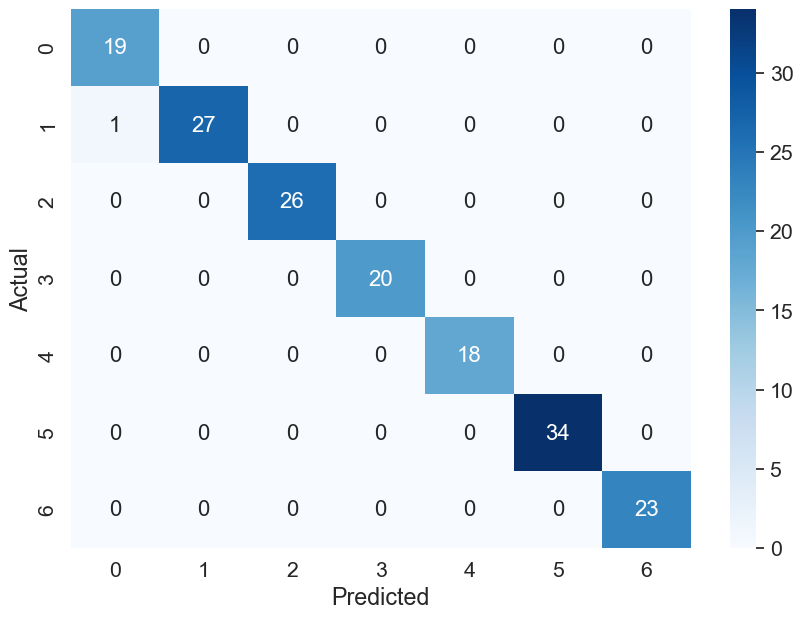

In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)

data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Plotting the confusion matrix
matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
precision =  precision_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1),average=None)
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1), normalize=True, sample_weight=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1), average=None)
print("Confusion Matrix:\n", matrix, "\n")
print("Accuracy:", accuracy, "\n")
print("Recall:", recall, "\n")
print("Precision:", precision)

6/6 [==============================] - 0s 57ms/step
Confusion Matrix:
 [[19  0  0  0  0  0  0]
 [ 1 27  0  0  0  0  0]
 [ 0  0 26  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 18  0  0]
 [ 0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0 23]] 

Accuracy: 0.9940476190476191 

Recall: [1.         0.96428571 1.         1.         1.         1.
 1.        ] 

Precision: [0.95 1.   1.   1.   1.   1.   1.  ]


In [28]:
from sklearn.metrics import classification_report
y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)
#Plotting the confusion matrix
target_names=['01_palm',
     '02_fist',
     '03_thumbs-up',
     '04_thumbs-down',
     '05_index-right',
     '06_index-left',
     '07_no-gesture']
print(classification_report(y_true, y_pred, target_names=target_names))

6/6 [==============================] - 0s 57ms/step
                precision    recall  f1-score   support

       01_palm       0.95      1.00      0.97        19
       02_fist       1.00      0.96      0.98        28
  03_thumbs-up       1.00      1.00      1.00        26
04_thumbs-down       1.00      1.00      1.00        20
05_index-right       1.00      1.00      1.00        18
 06_index-left       1.00      1.00      1.00        34
 07_no-gesture       1.00      1.00      1.00        23

      accuracy                           0.99       168
     macro avg       0.99      0.99      0.99       168
  weighted avg       0.99      0.99      0.99       168

